In [4]:
from bs4 import BeautifulSoup as bs
import requests
link = "https://www.amazon.in/Apple-iPhone-128GB-Deep-Purple/product-reviews/B0BDJH6GL8"
page=requests.get(link)
print(page)

<Response [200]>


In [5]:
soup = bs(page.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in">
 <!-- sp:feature:head-start -->
 <head>
  <script>
   var aPageStart = (new Date()).getTime();
  </script>
  <meta charset="utf-8"/>
  <!-- sp:end-feature:head-start -->
  <!-- sp:feature:csm:head-open-part1 -->
  <!-- sp:end-feature:csm:head-open-part1 -->
  <!-- sp:feature:cs-optimization -->
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
  <link href="https://m.media-amazon.com" rel="dns-prefetch"/>
  <link href="https://completion.amazon.com" rel="dns-prefetch"/>
  <!-- sp:end-feature:cs-optimization -->
  <!-- sp:feature:csm:head-open-part2 -->
  <!-- sp:end-feature:csm:head-open-part2 -->
  <!-- sp:feature:aui-assets -->
  <link href="https://m.media-amazon.com/images/I/11EIQ5IGqaL._RC|01e5ncglxyL.css,01lF2n-pPaL.css,412sHz-V95L.css,31ASPyl+r4L.css,01GZEvC5WIL.css,11GEPqXartL.css,01qPl4hxayL.css,01ITNc8rK9L.css,413Vvv3G

In [4]:
import pandas as pd
df = pd.read_csv('train.csv')
print(df)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

In [2]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
print(df.isnull())

     Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0      False   False    False       False      False          False   
1      False   False    False       False      False          False   
2      False   False    False       False      False          False   
3      False   False    False       False      False          False   
4      False   False    False       False      False          False   
..       ...     ...      ...         ...        ...            ...   
609    False   False    False       False      False          False   
610    False   False    False       False      False          False   
611    False   False    False       False      False          False   
612    False   False    False       False      False          False   
613    False   False    False       False      False          False   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0              False              False        True             False   
1

In [6]:
df.drop(index=0)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
from scipy.stats import norm 
from math import sqrt

alpha = 0.05
sample_mean = 585
pop_mean = 558
sample_size = 100
std_dev = 139 

def two_sided_hypo():
    global alpha, sample_mean, pop_mean, sample_size, std_dev
    actual_z = abs(norm.ppf(alpha/2))
    hypo_z = (sample_mean - pop_mean) / (std_dev/sqrt(sample_size))
    print('actual z value: ', actual_z)
    print('hypothesis z value: ', hypo_z, '\n')
    if hypo_z >= actual_z or hypo_z <= -(actual_z):
        return True
    else: 
        return False

print('alpha value:', alpha)
print('H0: μ =', pop_mean)
print('H1: μ ≠', pop_mean)
print('Result:', two_sided_hypo())

alpha value: 0.05
H0: μ = 558
H1: μ ≠ 558
actual z value:  1.9599639845400545
hypothesis z value:  1.9424460431654675 

Result: False


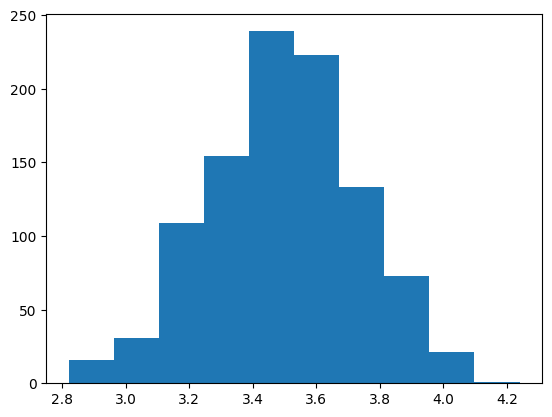

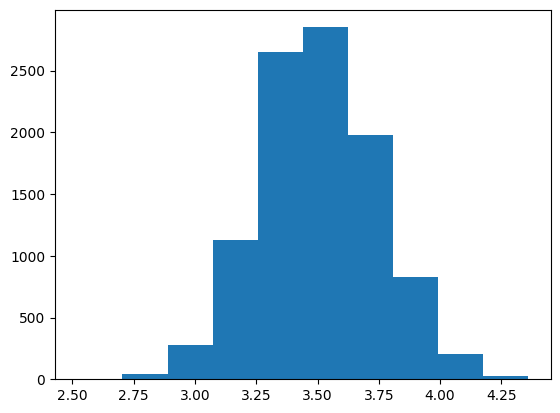

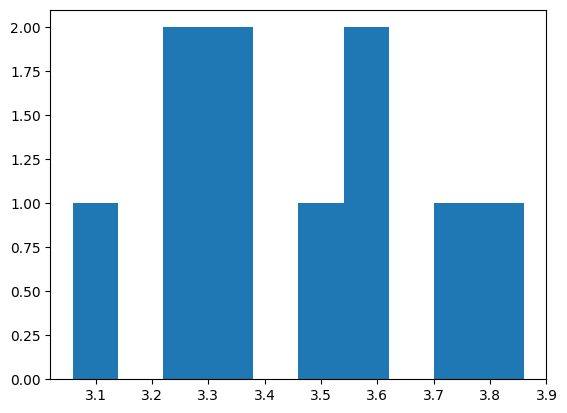

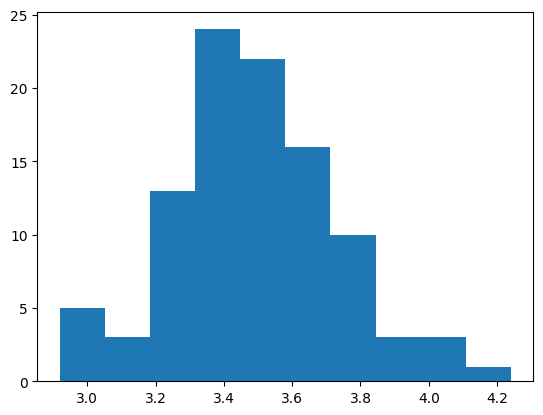

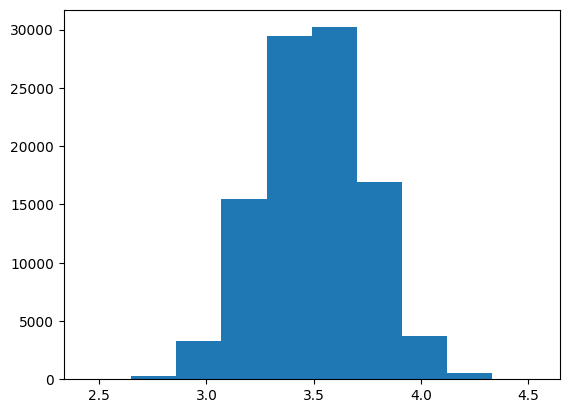

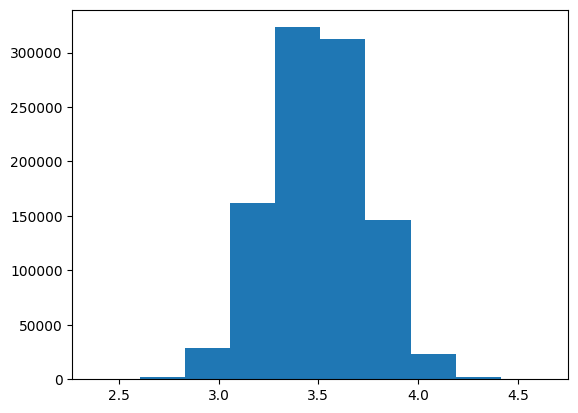

In [3]:
from numpy.random import seed 
from numpy.random import randint
from numpy import mean 
from matplotlib import pyplot

seed(1)

def plot_clt(n):
    means = [mean(randint(1,7,50)) for _ in range(n)]
  
    pyplot.hist(means)
    pyplot.show()

plot_clt(1000)
plot_clt(10000)
plot_clt(10)
plot_clt(100)
plot_clt(100000)
plot_clt(1000000)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [5]:
df = pd.read_csv('Foreign_Exchange_Rates.csv')
df = pd.read_csv('Foreign_Exchange_Rates.csv', 
                 usecols=[1,7], names = ["DATE", "CAD_ISD"],
                 skiprows=1, index_col=0, parse_dates=[0])
df

,CAD_ISD
DATE,
2000-01-03,1.4465
2000-01-04,1.4518
2000-01-05,1.4518
2000-01-06,1.4571
2000-01-07,1.4505
...,...
2019-12-25,ND
2019-12-26,1.3124
2019-12-27,1.3073


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
area = 0.95

print('z score:', norm.ppf(area))

z score: 1.6448536269514722


In [3]:
from scipy.stats import norm
def prob(a,b):
    z1 = (a-mu)/sigma
    z2 = (b-mu)/sigma
    print("Finding P(",z1,"< z <",z2,")")
    print("area to the left of a:",norm.cdf(z1))
    print("area to the left of b:",norm.cdf(z2))
    return norm.cdf(z2) - norm.cdf(z1)
mu =50
sigma = 5
prob(44.5,55.5)

Finding P( -1.1 < z < 1.1 )
area to the left of a: 0.13566606094638267
area to the left of b: 0.8643339390536173


np.float64(0.7286678781072347)

In [4]:
def fun (z1, z2):
    return norm.cdf(z1) - norm.cdf(z2)

a = 65
b = 32
mu = 25
sigma = 5
z1 = (a-mu)/sigma
z2 = (b-mu)/sigma
area = fun(z1,z2)
print(area)

0.0807566592337704


In [ ]:
%matplotlib inline
"""
This code sets up the inline backend for matplotlib, which allows plots to be displayed directly within Jupyter notebooks.

The `%matplotlib inline` magic command is specific to IPython and Jupyter notebooks. It configures the matplotlib library to display plots inline, meaning that the plots/graphs will be embedded in the notebook itself, right below the code cells that produce them.

Note: This command is not standard Python syntax and will not work outside of an IPython or Jupyter notebook environment.
"""
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm
sigma = 10
z_score = 1.96
moe = []
x = range(20, 801)

In [2]:
import csv
import pandas as pd
from random import sample

df = pd.read_csv('train.csv')

no_of_elements=10
random_index=sample(range(df.shape[0]),no_of_elements)
print(random_index)
print(df.iloc[random_index])

Kth = 100
index = [i for i in range(df.shape[0]) if i%Kth==0]

print(df.iloc[index])

SyntaxError: unmatched ']' (2731534395.py, line 8)

In [3]:
|""

SyntaxError: invalid syntax (2284284169.py, line 1)

In [4]:
|

SyntaxError: invalid syntax (525519296.py, line 1)

In [5]:
|

SyntaxError: invalid syntax (525519296.py, line 1)

In [6]:
|""

SyntaxError: invalid syntax (2284284169.py, line 1)